## Bibliotecas e Configurações Gerais
Centralização das bibliotecas usadas e configurações globais

- set_option: para não limitar no print a quantidade de linhas nem de colunas.

- plt: biblioteca para criar gráficos. O plt.style.use define o estilo com grade escura de fundo. O plt.rcParams['figure.figsize'] define o tamanho padrão das figuras.

- sns: biblioteca de visualização estatística. O sns.set_palette define a paleta de cores padrão como "husl" (Hue-Saturation-Lightness), que é um sistema de cores que gera cores alegres e bem diferenciadas entre si.

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Abertura do Arquivo
Primeiro abrimos o arquivo transformando ele num dataframe onde podemos fazer todas as analises seguintes.

Logo após a abertura, verificamos as informações mais generalistas:
- Quantidade de linhas
- Colunas: tipos e quantidade de linhas não nulas.

In [2]:
df = pd.read_csv('./dados_brutos.csv')

## Análise Inicial

Aqui podemos observar a tripla ocorrência da coluna "Data Acidente" sendo necessário a identificação da correta e remoção das demais.


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157845 entries, 0 to 157844
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Agente  Causador  Acidente    157845 non-null  object
 1   Data Acidente                 157845 non-null  object
 2   Data Acidente.1               157845 non-null  object
 3   CBO                           157845 non-null  object
 4   CID-10                        157845 non-null  object
 5   CNAE2.0 Empregador            157845 non-null  int64 
 6   CNAE2.0 Empregador Descrição  157845 non-null  object
 7   Emitente CAT                  157845 non-null  object
 8   Espécie do benefício          157845 non-null  object
 9   Filiação Segurado             157845 non-null  object
 10  Indica Óbito Acidente         157845 non-null  object
 11  Munic Empr                    157845 non-null  object
 12  Natureza da Lesão             157845 non-null  object
 13 

A função describe retorna um resumo automático colunas e possibilita entender melhor como os dados estão distribuídos e onde pode ter algum problema de preenchimento.
Dando uma olhada nesse resumo, podemos observar que a coluna "Data Acidente.2" tem um padrão de data bem mais consistente (DD/MM/AAAA), enquanto as outras colunas de data uma proeminênciade valores invalidos como 0000/00 e 00/00/0000, o que pode inviabilizar as análises por período.

Outra coisa interessante: todos os registros mostram que a CAT (Comunicação de Acidente de Trabalho) foi cadastrada pela internet. Isso pode significar que essa base só tem os casos que foram notificados online ou a prevalência da realização via Internet.

A coluna "Data Nascimento" possui muitos registros inválidos, inviabilizando analises profundas sobre a idade das pessoas que
sofreram acidentes.

No geral, essa primeira análise nos retorna alguns padrões interessantes, mas também deixa claro que tem vários problemas de qualidade nos dados que precisam ser ajustados antes de partir pra análises mais profundas.

In [4]:
df.describe(include='all')

,Agente Causador Acidente,Data Acidente,Data Acidente.1,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador Descrição,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.2,Data Despacho Benefício,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
count,157845,157845,157845,157845,157845,157845.000000,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157845,157844,157845
unique,298,151,5,1677,2634,NaN,610,6,3,4,2,3321,29,1,45,4,3,17,28,5,5,18114,92,4318
top,Impacto de Pes. Contra Objeto em Movimento,13/03/2023,2023/03,{ñ class},{ñ class},NaN,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,355030-São Paulo,Fratura,Internet,Dedo,Masculino,Típico,Maranhão,São Paulo,2023/03,0000/00,00/00/0000,28/03/2023,0
freq,9471,2373,52220,17216,7871,NaN,15152,151250,157840,156469,157119,14298,27786,157845,35112,101381,117174,53960,53960,52220,157840,1148,2843,151932
mean,NaN,NaN,NaN,NaN,NaN,4937.363534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2758.393082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2610.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4711.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em seguida, um amostra pequena das 5 primeiras linhas do arquivo

In [5]:
df.head(5)

,Agente Causador Acidente,Data Acidente,Data Acidente.1,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador Descrição,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.2,Data Despacho Benefício,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,"Ataque de Ser Vivo por Mordedura, Picada, Chi",24/04/2023,2023/04,621005-Trab. Agropecuário em Geral,M23.8 Outr Transt Internos do Joelho,0,{ñ class},Empregador,Pa,Empregado,Não,000000-Ignorado,Lesao Imediata,Internet,Joelho,Masculino,Típico,Zerado,Zerado,2023/04,0000/00,05/06/1977,01/05/2023,0
1,Rua e Estrada - Superficie Utilizada para Sus,27/03/2023,2023/03,252105-Administrador,S42.0 Frat da Clavicula,4711,"Comercio Varejista de Mercadorias em Geral, c",Segurado/Dependente,Pa,Empregado,Não,354990-São José dos Campos,Fratura,Internet,Ombro,Masculino,Trajeto,Maranhão,São Paulo,2023/03,0000/00,05/06/1977,01/05/2023,6.057.223.029.820
2,Impacto de Pes. Contra Objeto em Movimento,30/04/2023,2023/04,322205-Tec. de Enfermagem,Y28.8 Outr Locais Espec,8610,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,520870-Goiânia,"Outras Lesoes, Nic",Internet,Dedo,Feminino,Típico,{ñ class},Goiás,2023/04,0000/00,08/08/1992,01/05/2023,0
3,Agente Infeccioso ou Parasitario - Inclui Bac,31/03/2023,2023/03,212405-Analista de Desenv. de Sist.,B34.2 Infecc p/Coronavirus Ne,8610,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,431490-Porto Alegre,Doenca Contagiosa ou Infecciosa (Tuberculos,Internet,Aparelho Respiratorio,Masculino,Doença,{ñ class},Rio Grande do Sul,2023/03,0000/00,31/05/1981,NaN,0
4,"Chave de Porca ou de Abertura Regulavel, Chav",15/04/2023,2023/04,724115-Inst. Tubulações,S62.5 Frat do Polegar,4322,"Instalacoes Hidraulicas, de Sistemas de Venti",Segurado/Dependente,Pa,Empregado,Não,170210-Araguaína,Fratura,Internet,Dedo,Masculino,Típico,Sergipe,Tocantins,2023/04,0000/00,20/10/1994,01/05/2023,13.529.221.000.101


## Distribuição de duplicidade e nulos nas colunas
Abaixo foi criado 2 gráficos: duplicidade e nulidade nas colunas.

O percentual de nulos é baixo para a maioria das colunas, com exceção da data de emissão CAT que pode se dar devido a ter um alto volume nesta data.

A duplicidade é baixa, tendo apenas 7 linhas duplicadas.

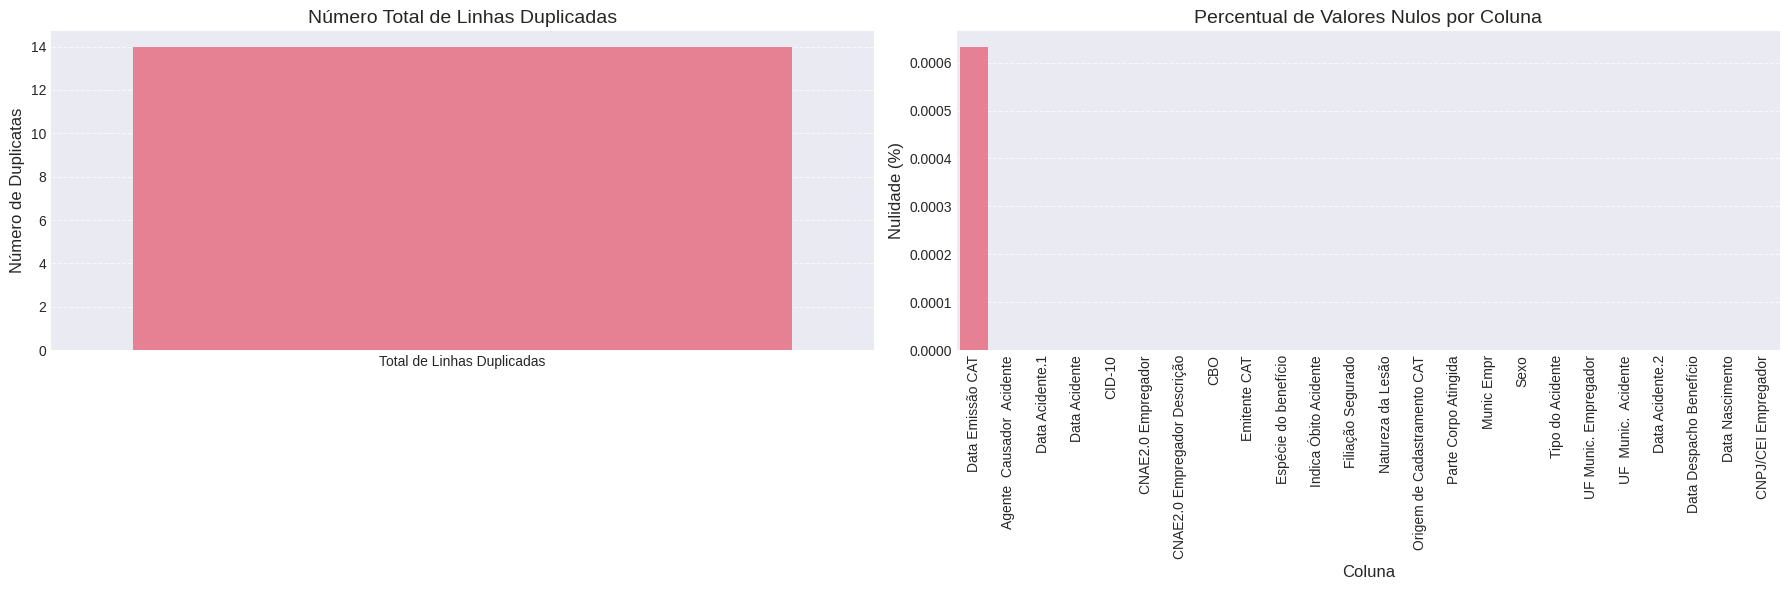

In [7]:
total_duplicated_rows = df.duplicated(keep=False).sum()

nullity_by_column = (df.isnull().sum() / len(df)) * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=['Total de Linhas Duplicadas'], y=[total_duplicated_rows], ax=axes[0], palette='husl')
axes[0].set_title('Número Total de Linhas Duplicadas', fontsize=14)
axes[0].set_ylabel('Número de Duplicatas', fontsize=12)
axes[0].set_xlabel('', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=nullity_by_column.sort_values(ascending=False).index, y=nullity_by_column.sort_values(ascending=False).values, ax=axes[1], palette='husl')
axes[1].set_title('Percentual de Valores Nulos por Coluna', fontsize=14)
axes[1].set_ylabel('Nulidade (%)', fontsize=12)
axes[1].set_xlabel('Coluna', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Análise Temporal
Aqui a ideia é focar na análise relacionada a datas, em especial a data do acidente. Assim podemos extrair informações o período do acidente (ano, mês e semana).

Primeiro, realizamos a normalização da coluna "Data Acidente.2" porque ela tem informações do dia, mês e ano e também da coluna "Data de Nascimento" que será posteriormente usada em outra análise.

In [15]:
for col in ['Data Acidente.2', 'Data Nascimento']:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

df['Idade'] = (df['Data Acidente.2'] - df['Data Nascimento']).dt.days / 365.25
df['Ano'] = df['Data Acidente.2'].dt.year
df['Mes'] = df['Data Acidente.2'].dt.month
df['DiaSemana'] = df['Data Acidente.2'].dt.day_name()


Em seguida, criamos 4 gráficos para vermos a evolução/quantidade de acidentes por mês, por dia da semana e por ano.

Aqui podemos observar que não temos uma variedade de anos, ficando apenas com dados de 2023. Não sendo possível realizar uma análise temporal por ano.

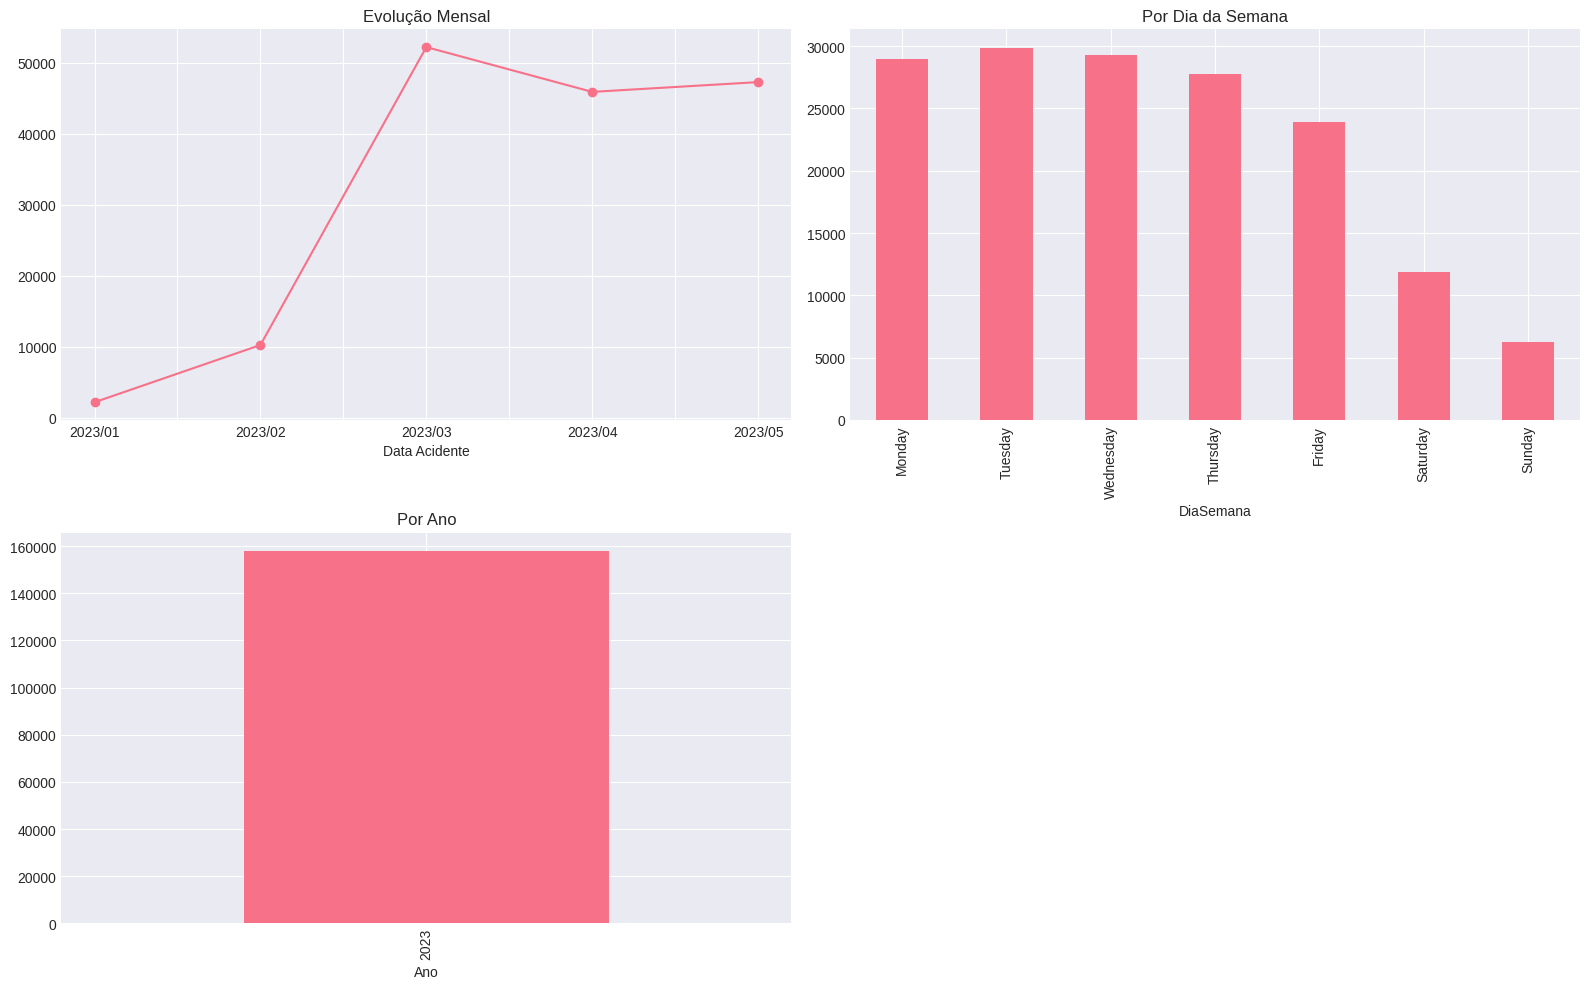

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['Data Acidente'].value_counts().sort_index().plot(ax=axes[0,0], marker='o')
axes[0,0].set_title('Evolução Mensal')

ordem = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['DiaSemana'].value_counts().reindex(ordem).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Por Dia da Semana')

df['Ano'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Por Ano')

axes[1,1].axis('off')

plt.tight_layout()
plt.show()


Primeiro, os dados foram agrupados pela data do acidente para contar quantos acidentes ocorreram em cada dia. Depois, foram removidas as datas nulas e os registros foram organizados em ordem temporal. Para fazermos a regressão linear, as datas foram convertidas em um número de dias a partir da primeira data. Essa variável representa o tempo, enquanto a quantidade diária de acidentes é o valor analisado.

Foi aplicada uma regressão linear para verificar a tendência dos acidentes ao longo do tempo. Com o modelo, calculmaos os valores previstos e os resíduos, que representam a diferença entre os valores reais e os estimados. Foram considerados outliers os dias em que o resíduo padronizado teve valor absoluto maior que 3. Por fim, foram analisados o R^2 do modelo, a tendência média de variação por dia de acidentes e a quantidade de outliers encontrados.

In [17]:
temp = df.groupby('Data Acidente.2').size().reset_index(name='acidentes')
temp = temp.dropna().sort_values('Data Acidente.2')
temp['dias'] = (temp['Data Acidente.2'] - temp['Data Acidente.2'].min()).dt.days

X_temp = temp['dias'].values.reshape(-1, 1)
y_temp = temp['acidentes'].values

model_temp = LinearRegression()
model_temp.fit(X_temp, y_temp)
y_pred_temp = model_temp.predict(X_temp)

res_temp = y_temp - y_pred_temp
res_pad_temp = (res_temp - res_temp.mean()) / res_temp.std()

outliers_temp = np.abs(res_pad_temp) > 3
temp['eh_outlier'] = outliers_temp

print(f'R^2 do modelo: {model_temp.score(X_temp, y_temp):.4f}')
print(f'Tendência: {model_temp.coef_[0]:.6f} acidentes/dia')
print(f'\n Outliers: {outliers_temp.sum()}')

R^2 do modelo: 0.3827
Tendência: 12.707072 acidentes/dia

 Outliers: 0


A análise de regressão linear mostrou um R^2 de 0.38, indicando uma tendência de aumento de cerca de 12,7 acidentes por dia ao longo do tempo. Não foram encontrados outliers nos dados temporais e todos os acidentes ocorreram em 2023, como podemos ver no gráfico abaixo.

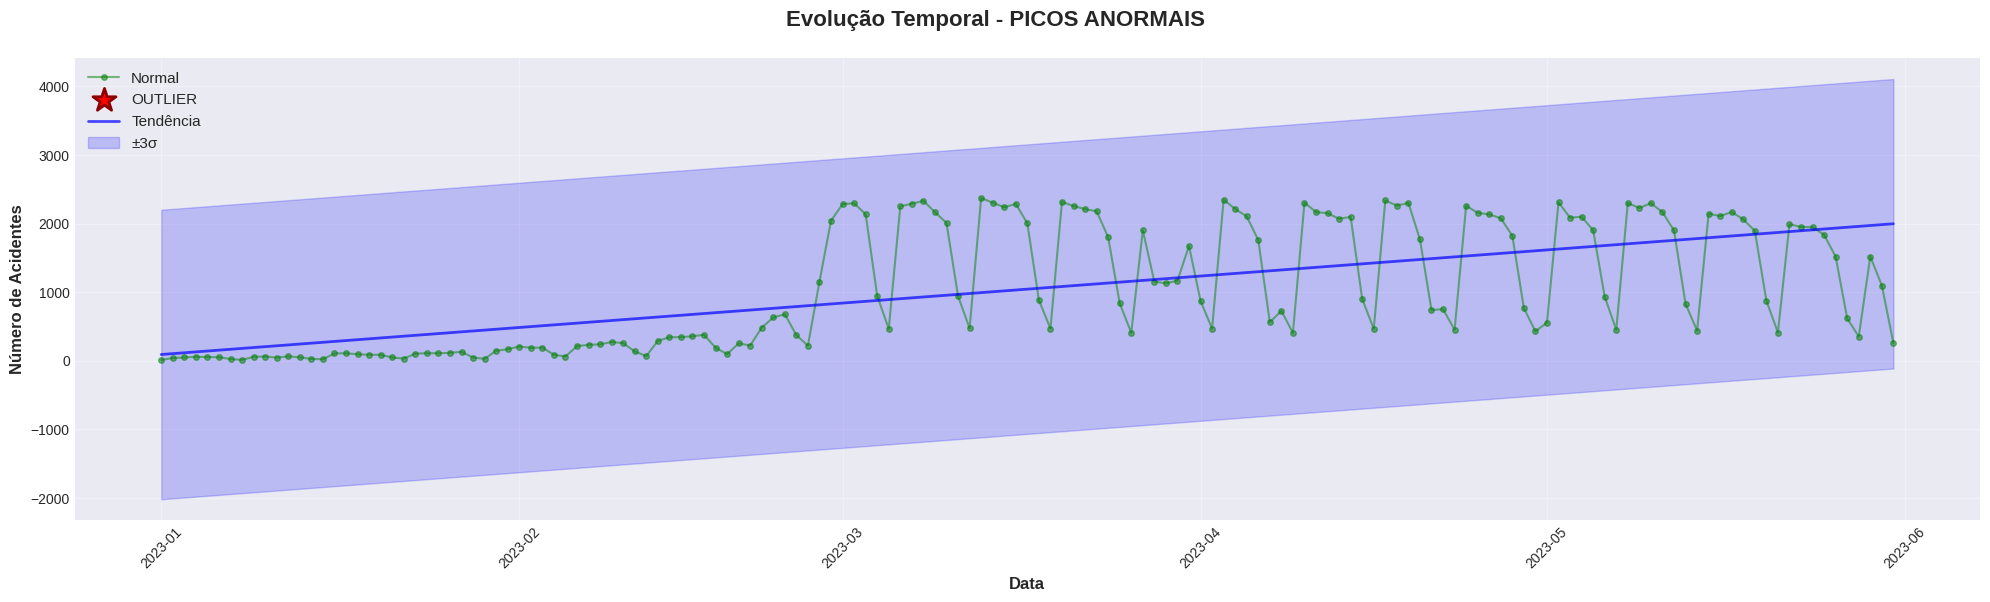

In [18]:
fig, axes = plt.subplots(figsize=(20, 6))
fig.suptitle('Evolução Temporal - PICOS ANORMAIS',
             fontsize=16, fontweight='bold', y=0.995)

axes.plot(temp['Data Acidente.2'][~temp['eh_outlier']],
            temp['acidentes'][~temp['eh_outlier']],
            'o-', color='green', alpha=0.5, markersize=4, label='Normal')
axes.scatter(temp['Data Acidente.2'][temp['eh_outlier']],
               temp['acidentes'][temp['eh_outlier']],
               s=300, color='red', marker='*', label='OUTLIER',
               edgecolors='darkred', linewidths=2, zorder=5)

dates_for_plot = temp['Data Acidente.2'].values
axes.plot(dates_for_plot, y_pred_temp, 'b-', linewidth=2, label='Tendência', alpha=0.7)

std_temp = res_temp.std()
axes.fill_between(dates_for_plot, y_pred_temp - 3*std_temp, y_pred_temp + 3*std_temp,
                     alpha=0.2, color='blue', label='±3σ')

axes.set_xlabel('Data', fontweight='bold', fontsize=12)
axes.set_ylabel('Número de Acidentes', fontweight='bold', fontsize=12)
axes.legend(fontsize=11)
axes.grid(alpha=0.3)
axes.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Análise por Tipo de Acidente
Nessa análise vamos entender os tipos de acidentes e características associadas (CNAE, lesão, etc).

Aqui buscamos visualisar a distribuição a partir da recorrência dos tipos de acidentes. Os gráficos mostram a distribuição dos tipos de acidente em pizza e as 10 lesões mais frequentes em barras horizontais.

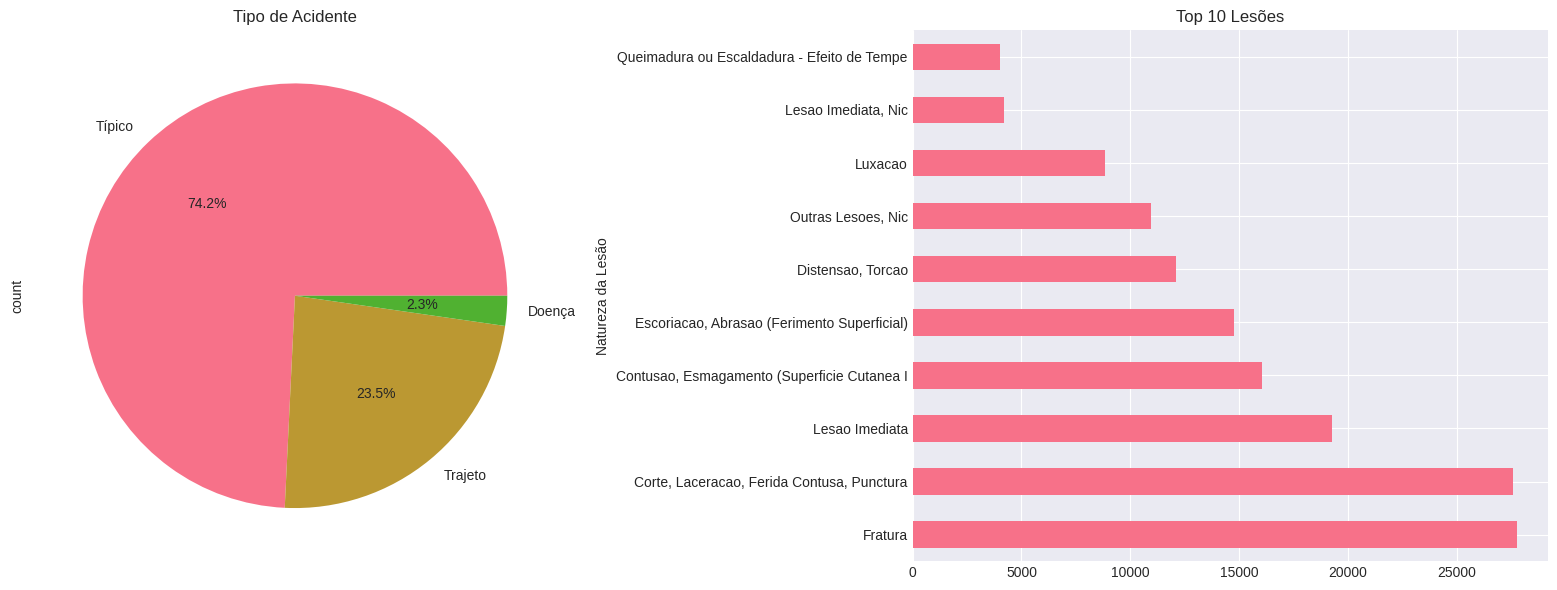

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df['Tipo do Acidente'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Tipo de Acidente')

df['Natureza da Lesão'].value_counts().head(10).plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 Lesões')

plt.tight_layout()
plt.show()

O gráfico abaixo mostra a relação entre CNAE e quantidade de acidentes em escala logarítmica, com a linha de regressão e os outliers identificados. Para identificar os CNAEs com comportamento anormal, aplicamos uma regressão linear em escala log, similar ao processo usado na análise temporal.

In [20]:
cnae_freq = df.groupby('CNAE2.0 Empregador').size().reset_index(name='total_acidentes')
cnae_freq = cnae_freq.sort_values('total_acidentes').reset_index(drop=True)

X_cnae = np.arange(len(cnae_freq)).reshape(-1, 1)
y_cnae = cnae_freq['total_acidentes'].values

y_log = np.log(y_cnae)

model_cnae = LinearRegression()
model_cnae.fit(X_cnae, y_log)

y_pred_log = model_cnae.predict(X_cnae)
y_pred = np.exp(y_pred_log)

res_log = y_log - y_pred_log
res_pad_log = (res_log - res_log.mean()) / res_log.std()

outliers_cnae = np.abs(res_pad_log) > 3
cnae_freq['eh_outlier'] = outliers_cnae

print(f'R^2 (log): {model_cnae.score(X_cnae, y_log):.4f}')
print(f'Outliers: {outliers_cnae.sum()}')

if outliers_cnae.sum() > 0:
    top_outliers = cnae_freq[cnae_freq['eh_outlier']].nlargest(10, 'total_acidentes')
    print(top_outliers[['CNAE2.0 Empregador', 'total_acidentes']].to_string(index=False))


R^2 (log): 0.9454
Outliers: 16
 CNAE2.0 Empregador  total_acidentes
               8610            15152
               4711             6578
               4930             4430
                  0             4272
               8411             3819
               5913                1
               5912                1
               6431                1
               4542                1
               3513                1


A regressão linear em escala log apresentou um R^2 de 0.95, indicando um bom ajuste porque o valor está próximo de 1, o que significa que o modelo explica 95% da variação dos dados. Foram identificados 16 CNAEs como outliers, sendo os principais: 8610 (15152 acidentes), 4711 (6578), 4930 (4430), 0 (4272) e 8411 (3819). Esses CNAEs se destacam porque têm uma quantidade de acidentes muito acima ou muito abaixo do esperado pela tendência geral, indicando setores com maior ou menor risco de acidentes do que a média.

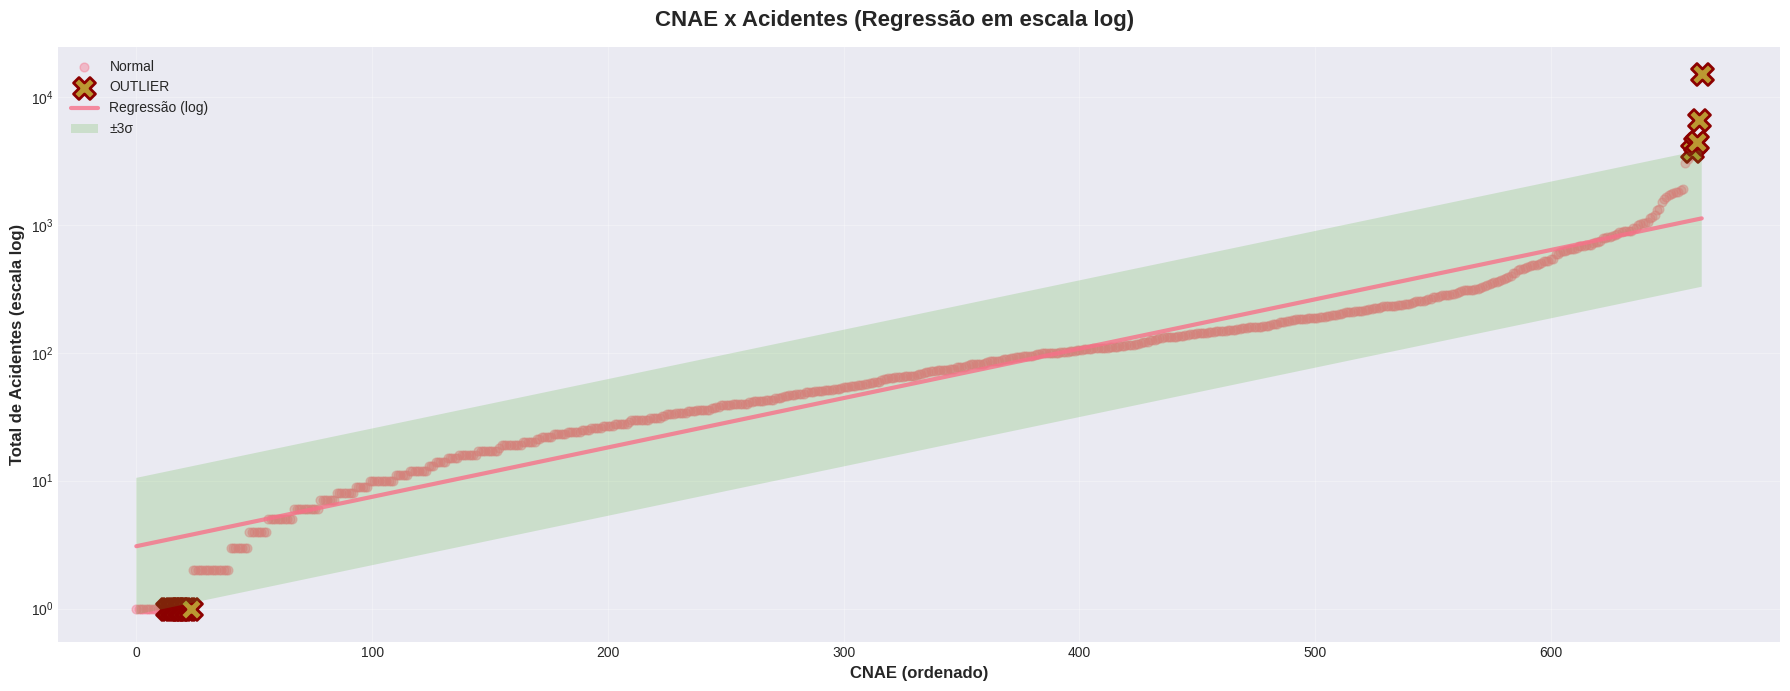

In [21]:
fig, ax = plt.subplots(figsize=(18, 7))
fig.suptitle('CNAE x Acidentes (Regressão em escala log)',
             fontsize=16, fontweight='bold')

ax.scatter(
    X_cnae[~outliers_cnae], y_cnae[~outliers_cnae],
    alpha=0.4, s=40, label='Normal'
)
ax.scatter(
    X_cnae[outliers_cnae], y_cnae[outliers_cnae],
    alpha=1, s=250, marker='X',
    label='OUTLIER', edgecolors='darkred', linewidths=2
)

y_log = np.log(y_cnae)
model_cnae = LinearRegression()
model_cnae.fit(X_cnae, y_log)

y_pred_log = model_cnae.predict(X_cnae)
y_pred = np.exp(y_pred_log)

ax.plot(
    X_cnae, y_pred,
    linewidth=3, label='Regressão (log)', alpha=0.8
)

res_log = y_log - y_pred_log
std_log = res_log.std()

ax.fill_between(
    X_cnae.ravel(),
    np.exp(y_pred_log - 3*std_log),
    np.exp(y_pred_log + 3*std_log),
    alpha=0.2, label='±3σ'
)

ax.set_xlabel('CNAE (ordenado)', fontweight='bold', fontsize=12)
ax.set_ylabel('Total de Acidentes (escala log)', fontweight='bold', fontsize=12)
ax.set_yscale('log')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Análise Demográfica
Nessa análise vamos entender as características demográficas das pessoas que sofreram acidentes, como sexo, idade, localização e ocorrência de óbitos.

Os gráficos mostram que a maioria dos acidentes ocorre com pessoas do sexo masculino (64,2%), a faixa etária mais afetada está entre 20 e 30 anos, São Paulo concentra mais de 50 mil casos seguido por Minas Gerais e Paraná, e a grande maioria dos acidentes não resulta em óbito o que justifica a retirada dessa coluna em um tratamento dos dados.



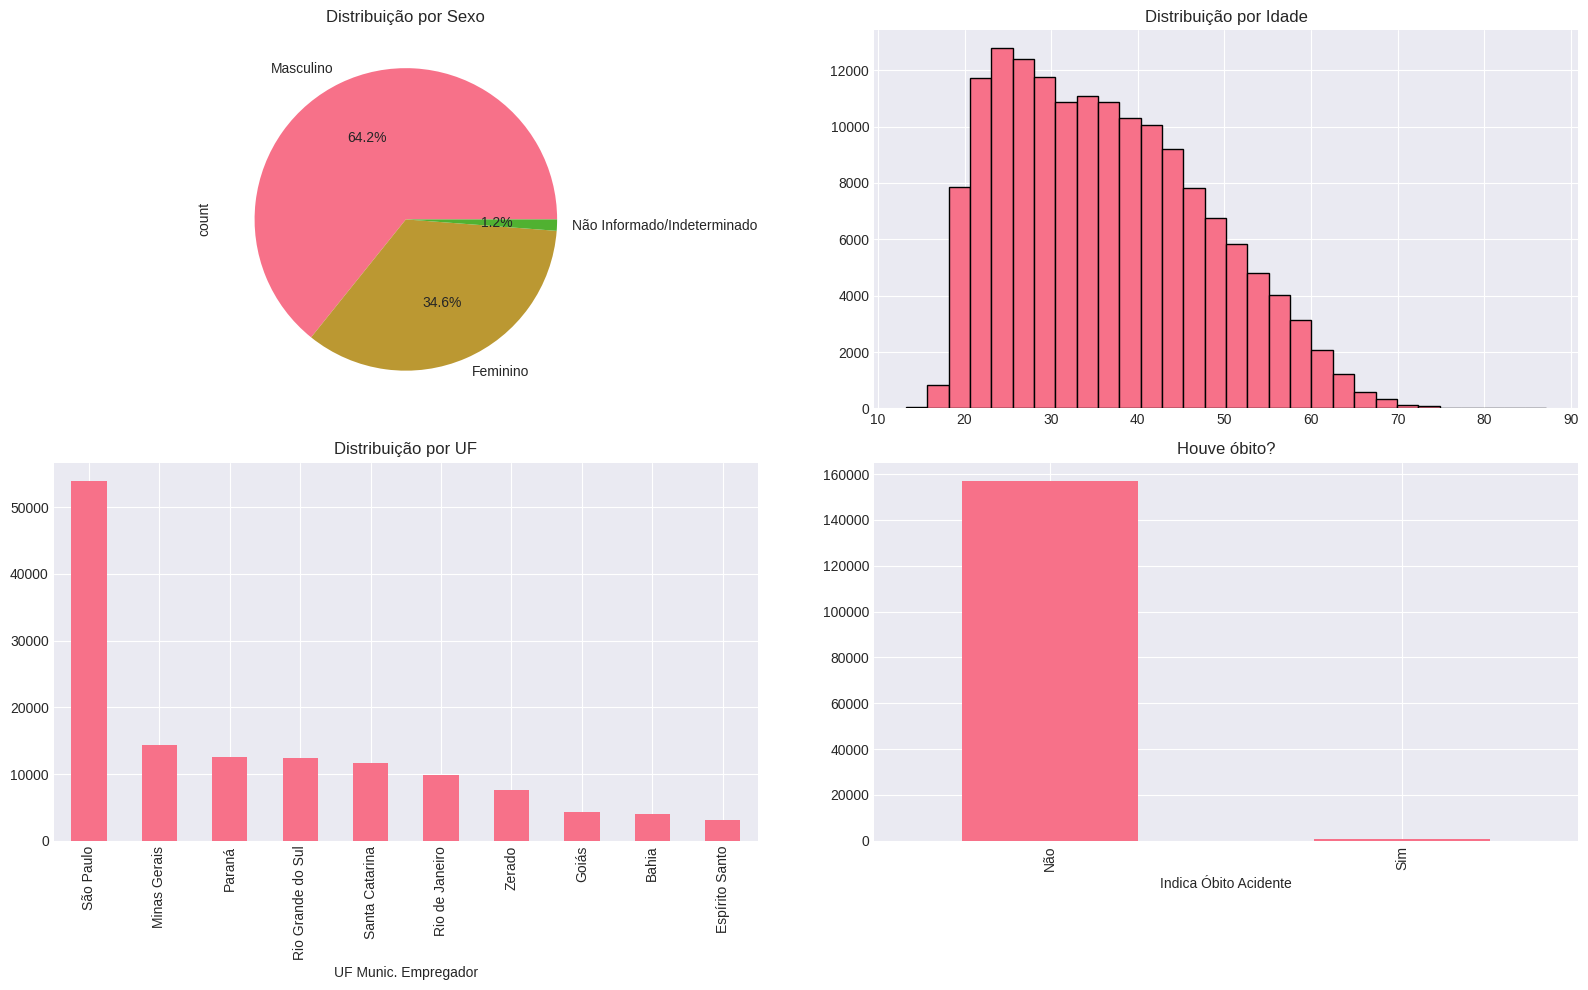

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df['Sexo'] = df['Sexo'].replace(['Indeterminado', 'Não Informado'], 'Não Informado/Indeterminado')
df['Sexo'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title("Distribuição por Sexo")

df['Idade'].hist(bins=30, ax=axes[0,1], edgecolor='black')
axes[0,1].set_title("Distribuição por Idade")

df['UF Munic. Empregador'].value_counts().head(10).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title("Distribuição por UF")

df['Indica Óbito Acidente'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title("Houve óbito?")

plt.tight_layout()
plt.show()

A regressão linear mostrou um R^2 de 0.38 e um coeficiente angular de -0,22, indicando uma tendência de diminuição na frequência de acidentes conforme a idade aumenta. Foram identificados 325 outliers, sendo a maioria idades entre 13 e 16 anos com frequência muito baixa de acidentes, o que é esperado já que essas idades estão abaixo da idade mínima para trabalho formal.

In [24]:
idade_freq = df.groupby('Idade').size().reset_index(name='num_acidentes')
idade_freq = idade_freq.dropna()

X = idade_freq['Idade'].values.reshape(-1, 1)
y = idade_freq['num_acidentes'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuos = y - y_pred
residuos_padronizados = (residuos - residuos.mean()) / residuos.std()

# Detectar outliers (resíduo > 3 desvios padrão)
threshold = 3
outliers_mask = np.abs(residuos_padronizados) > threshold
outliers_idx = idade_freq[outliers_mask].index

print(f'R^2 do modelo: {model.score(X, y):.4f}')
print(f'Coeficiente angular: {model.coef_[0]:.4f}')
print(f'\n Outliers: {outliers_mask.sum()} pontos')
print(f'Critério: |resíduo padronizado| > {threshold}')

if outliers_mask.sum() > 0:
    print('\nIdades com frequência ANORMAL:')
    print(idade_freq[outliers_mask][['Idade', 'num_acidentes']].to_string(index=False))

R^2 do modelo: 0.3795
Coeficiente angular: -0.2160

 Outliers: 325 pontos
Critério: |resíduo padronizado| > 3

Idades com frequência ANORMAL:
    Idade  num_acidentes
13.248460              1
14.255989              1
14.329911              1
14.409309              1
14.800821              1
14.822724              1
14.937714              1
15.096509              1
15.115674              1
15.154004              1
15.170431              1
15.230664              1
15.244353              1
15.285421              1
15.296372              1
15.318275              1
15.356605              2
15.359343              1
15.362081              1
15.383984              1
15.408624              1
15.485284              1
15.529090              1
15.572895              1
15.586585              2
15.597536              1
15.600274              1
15.616701              1
15.655031              1
15.657769              1
15.665982              1
15.687885              1
15.690623              1
15.69609

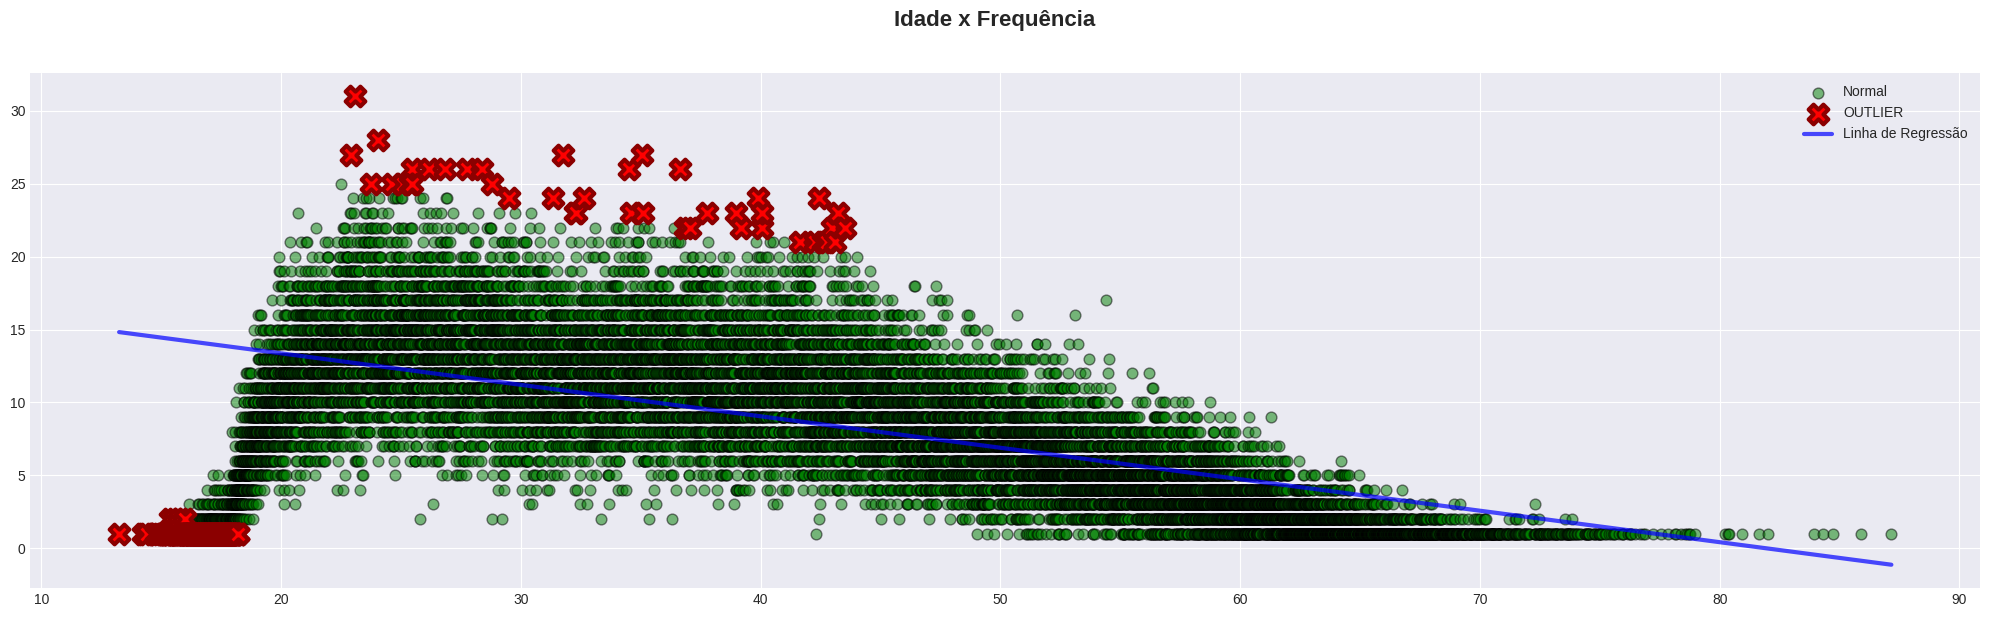

In [25]:
fig, axes = plt.subplots(figsize=(20, 6))

fig.suptitle('Idade x Frequência',
             fontsize=16, fontweight='bold', y=1.02)

axes.scatter(X[~outliers_mask], y[~outliers_mask],
             alpha=0.5, s=60,
             color='green', label='Normal',
             edgecolors='black')

axes.scatter(X[outliers_mask], y[outliers_mask],
             alpha=1, s=200,
             color='red', marker='X',
             label='OUTLIER',
             edgecolors='darkred', linewidths=3)

axes.plot(X, y_pred,
          'b-', linewidth=3,
          label='Linha de Regressão', alpha=0.7)

axes.legend()
plt.tight_layout()
plt.show()


## Conclusões

A análise dos dados de acidentes de trabalho mostrou alguns padrões importantes. Temporalmente, há uma tendência de aumento de cerca de 12,7 acidentes por dia ao longo de 2023, sem picos anormais. Na análise por CNAE, foram identificados 16 setores com comportamento atípico, sendo o CNAE 8610 (Atividades de atendimento hospitalar) o mais crítico com mais de 15 mil acidentes. Demograficamente, a maioria dos acidentes ocorre com homens (64,2%), na faixa etária de 20 a 30 anos, e São Paulo concentra mais da metade dos casos. A frequência de acidentes tende a diminuir conforme a idade aumenta, e a grande maioria dos casos não resulta em óbito.